# About the data

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

## Exercise 1: Load the loan data (datasets/breast_cancer.csv) using pandas

In [5]:
import pandas as pd
cancer = pd.read_csv("../../datasets/breast_cancer.csv", index_col=0)
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [6]:
Target = cancer.diagnosis.values
cancer.drop('diagnosis', inplace=True, axis='columns')

## Exercise 2: Scale the data

In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
cancer_scaled = scaler.fit_transform(cancer)
cancer_scaled

array([[ 1.13235294, -1.5026643 ,  1.26374006, ...,  1.71524826,
         2.63555556,  1.88457808],
       [ 1.76470588, -0.19005329,  1.61285862, ...,  0.89219446,
        -0.10666667,  0.43549952],
       [ 1.54901961,  0.42806394,  1.51261666, ...,  1.48305173,
         1.17185185,  0.3656644 ],
       ...,
       [ 0.79166667,  1.64120782,  0.76253025, ...,  0.43402094,
        -0.89481481, -0.08923375],
       [ 1.77205882,  1.86323268,  1.86173522, ...,  1.7111019 ,
         1.87407407,  2.13191077],
       [-1.375     ,  1.01243339, -1.32457656, ..., -1.03586607,
         0.07259259, -0.46799224]])

## Exercise 3: Perform PCA with 2 components

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(cancer_scaled)

## Exercise 4: Plot the explained variance ratio

In [18]:
pca.explained_variance_ratio_

array([0.44942509, 0.19578517])

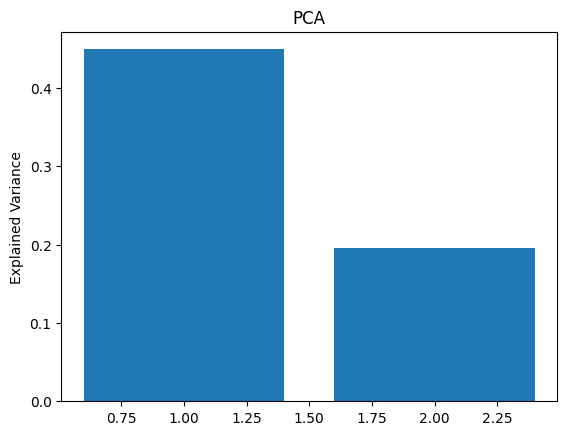

In [19]:
from matplotlib import pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('PCA')
plt.ylabel('Explained Variance')

plt.show()

## Exercise 5: Plot the first two principal components

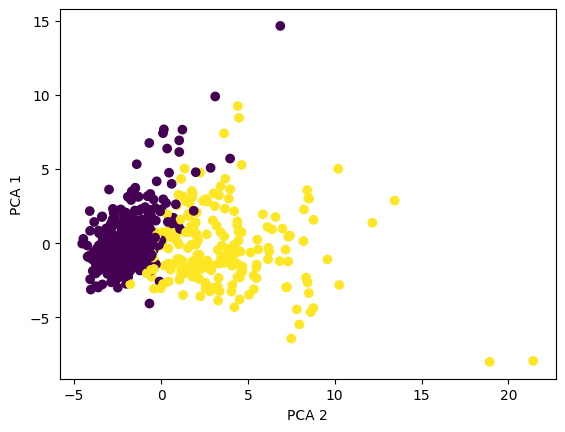

In [21]:
Target = pd.Categorical(Target).codes

plt.scatter(pca_df[:,0], pca_df[:,1], c=Target)
plt.ylabel('PCA 1')
plt.xlabel('PCA 2')

plt.show()

## Exercise 6: Plot a 3D scatter plot of the first three principal components

In [23]:
pca = PCA(n_components=3)
pca_df3 = pca.fit_transform(cancer_scaled)

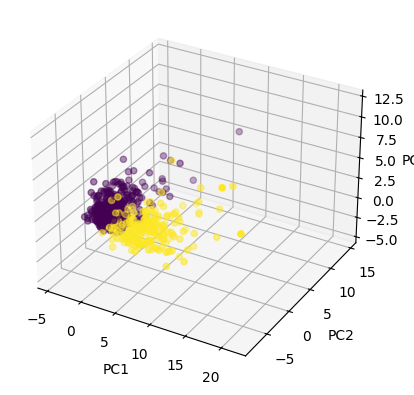

In [31]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df3[:,0], pca_df3[:,1], pca_df3[:,2], c=Target, cmap=cm.viridis)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

## Exercise 7: Try other dimensionality reduction techniques